In [6]:
from  tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset from a local file
data = np.load('./mnist.npz')
x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
from tensorflow import keras

def build_compile(optimizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [10]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop, Nadam

optimizers = {
    'SGD': SGD(),
    'SGD(momentum=0.9)': SGD(momentum=0.9),
    'Nadam': Nadam(),
    'Adagrad': Adagrad(),
    'RMSprop': RMSprop(),
    'Adam': Adam()
}

results = {}

for name, optimizer in optimizers.items():
    print(f"Training with optimizer: {name}")
    model = build_compile(optimizer)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0)
    results[name] = history.history


Training with optimizer: SGD
Training with optimizer: SGD(momentum=0.9)
Training with optimizer: Nadam
Training with optimizer: Adagrad
Training with optimizer: RMSprop
Training with optimizer: Adam


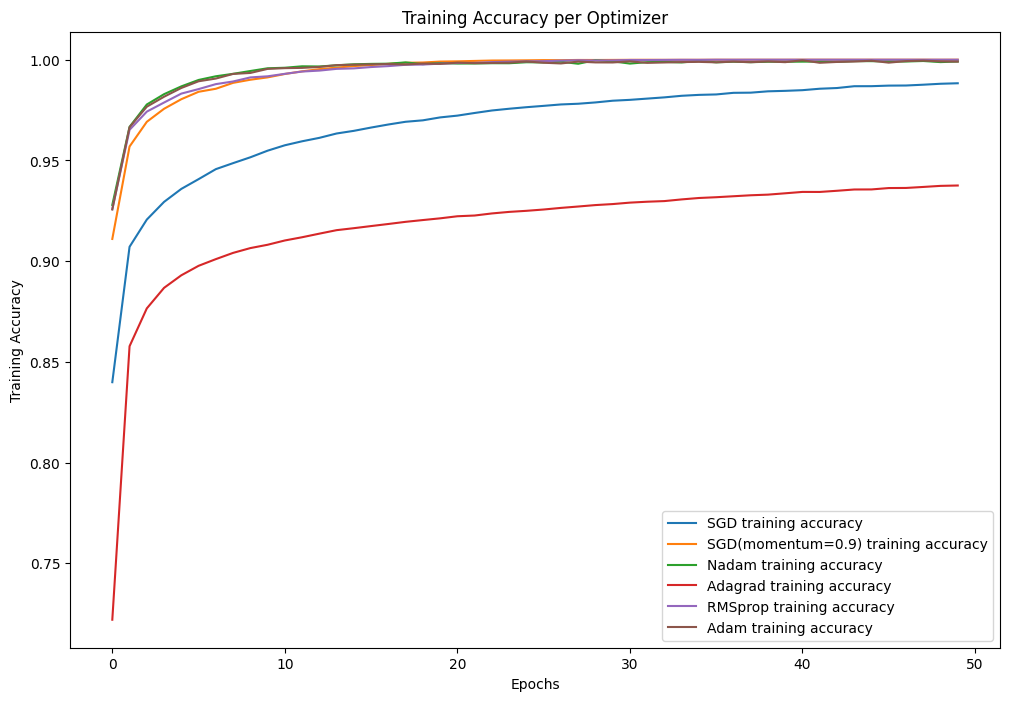

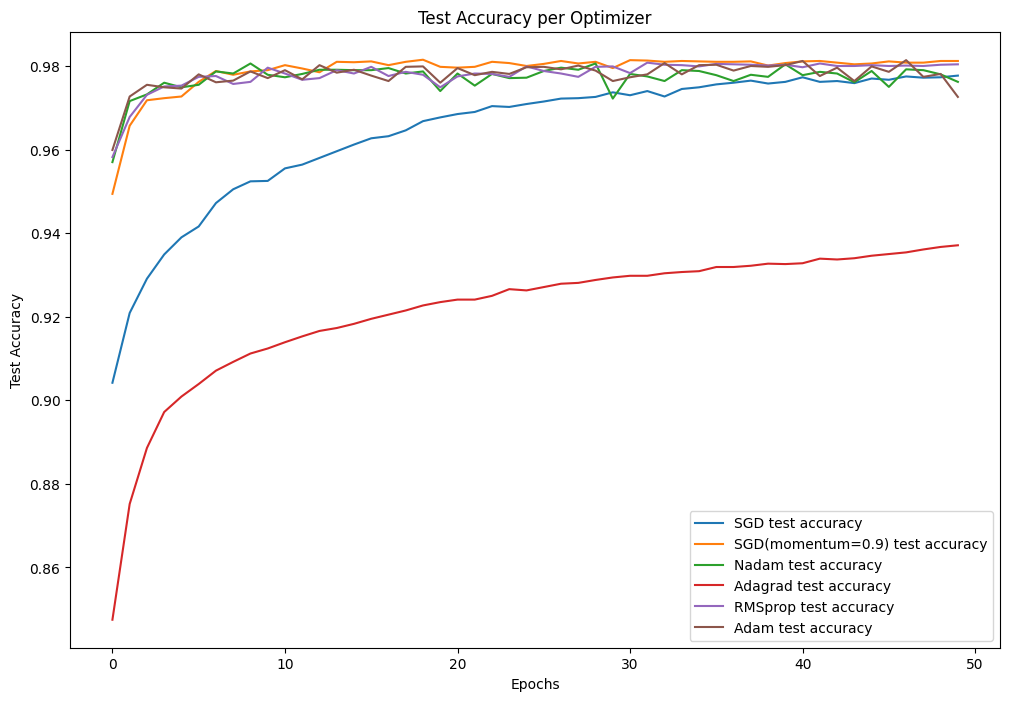

In [11]:
import matplotlib.pyplot as plt

# Training Accuracy vs. Epoch
plt.figure(figsize=(12, 8))
for name in optimizers.keys():
    plt.plot(results[name]['accuracy'], label=f'{name} training accuracy')

plt.title('Training Accuracy per Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Test Accuracy vs. Epoch
plt.figure(figsize=(12, 8))
for name in optimizers.keys():
    plt.plot(results[name]['val_accuracy'], label=f'{name} test accuracy')

plt.title('Test Accuracy per Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()


همانطور که از شکل مشخص می باشد نتایج دقت در هر دونمودار نزدیک می باشد و دقت بهینه ساز SGD  بالاتر می باشد . 